In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Simple Toy Example of Linear SVC SVM

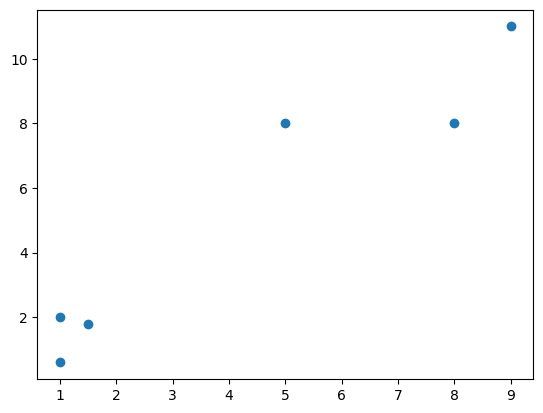

In [2]:
# Simple example from https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/
x_data = [1, 5, 1.5, 8, 1, 9]
y_data = [2, 8, 1.8, 8, 0.6, 11]

# Visualise the data
plt.scatter(x_data,y_data)
plt.show()

In [3]:
# Package x and y data into numpy array
data        = np.array([[1,2],[5,8],[1.5,1.8],[8,8],[1,0.6],[9,11]])
data_labels = [0,1,0,1,0,1]

# Create classifier with linear kernel and fit
clf = SVC(kernel='linear', C = 1.0)
#clf = make_pipeline(StandardScaler(), clf)
clf.fit(data,data_labels)

SVC(kernel='linear')

In [4]:
# Some test predictions
print(clf.predict(np.array([[0.58,0.76]])))
print(clf.predict(np.array([[10.58,10.76]])))

[0]
[1]


[0.1380943  0.24462418]


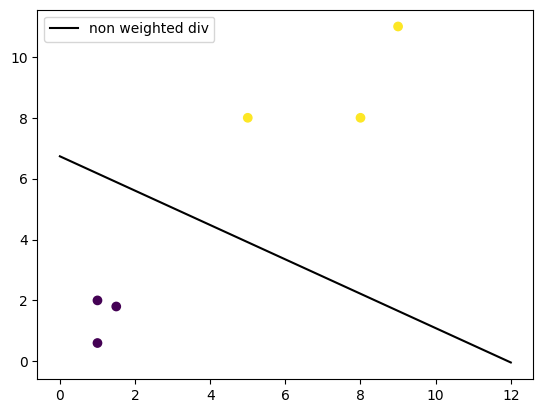

In [5]:
# Let's plot our linear classification
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(data[:, 0], data[:, 1], c = data_labels)
plt.legend()
plt.show()

Scikit Learn Dataset

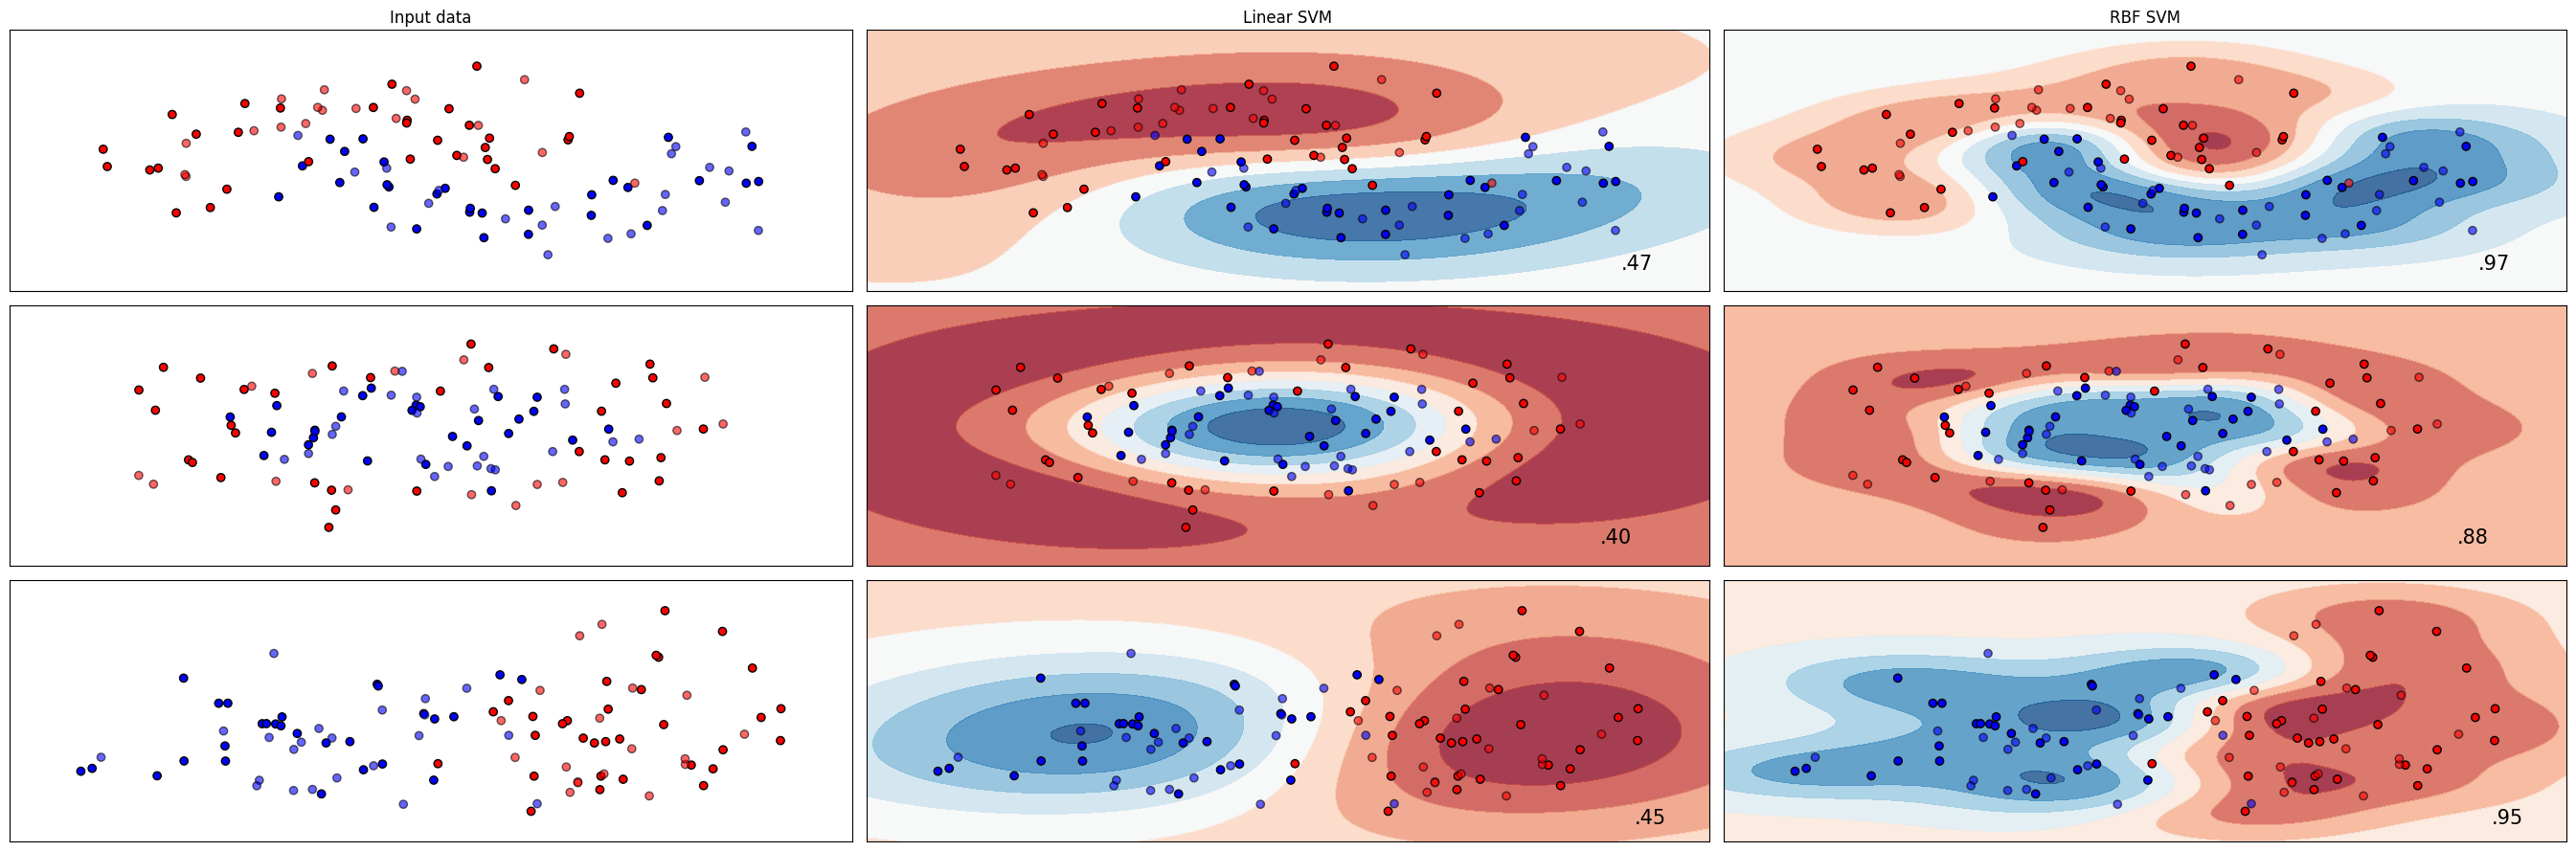

In [6]:
# Let's use more involved data sets from scikit-learn
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

names = [
    "Linear SVM",
    "RBF SVM",
]

classifiers = [
    SVC(kernel="rbf", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        # Ensure you scale and standardise your data!
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [7]:
#Typical datasets are multi-featured and therefore exist in a higher-dimension than we can visualise.
# Learning and training on multi-featured datasets is straightforward.
# Based on: https://www.kaggle.com/code/annastasy/heart-attack-eda-and-modeling

# Using pandas you can load a csv file into a dataframe
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

# Then you can extract the features and the output like so:
# Set a variable X to the features of the dataframe and y to the target column.
X = df.drop('output', axis=1)
y = df['output']

# From here you can split the data for training and try different svm kernels.
# You cannot visualise the output but you can print the training accuracy on test data.



FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv'